<a href="https://colab.research.google.com/github/nathan-barry/ml-studies/blob/main/diffusers_quicktour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HF Diffusers

- Provides pretrained vision and audio diffusion models
- Serves a modular toolbox for inference and training

- Offers
  - Sota diffusion pipelines that can be run in inference
  - Various noise schedulers
  - Multiple types of models, such as UNets, can be used as building blocks in an end-to-end diffusion system
  - Training examples


## Quicktour

- DiffusionPipeline is the easist way to use a pre-trained diffusion system for inference
- Can use it out-of-the-box for many tasks across different modalities

- Supports the following tasks
  - Image from noise
  - Image from text
  - Image adaption from image and text
  - Image inpainting from text
  - Image adaption of specific parts from image and text

In [2]:
!pip install diffusers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 524 kB 31.3 MB/s 
     |████████████████████████████████| 182 kB 71.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 32.1 MB/s 
     |████████████████████████████████| 7.6 MB 54.0 MB/s 


In [3]:
import transformers

In [4]:
from diffusers import DiffusionPipeline

# Load the model
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/617 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


- The DiffusionPipeline downloads and caches all modeling, tokeization, and scheduling components
- The model consists of ~1.4 billion parameters, should move it to GPU

In [5]:
# Just like in PyTorch
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.11.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
# Use pipeline on your text prompt:
image = pipeline("An image of a squirrel in Picasso style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

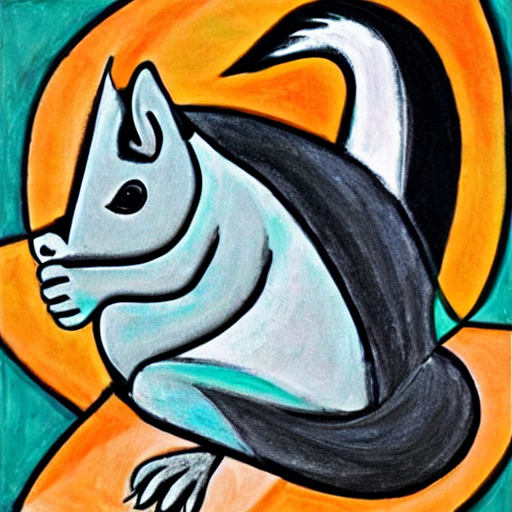

In [7]:
display(image)

- The output is by default wrapped into a PIL Image Object

In [ ]:
# Save the image
image.save("image_of_squirrel_painting.png")

In [ ]:
# Can use the pipeline locally by downloading the weights via:
!git lfs install
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5

In [ ]:
# load the saved weights into the pipeline
pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5")

In [ ]:
# Running the pipeline is identical as before
pipeline.to("cuda")
image = pipeline("An image of a squirrel in Picasso style").images[0]
image.save("image_of_squirrel_painting.png")

- Diffusion systems can be used with multiple different schedulers each with their pros and cons
- Stable diffusion runs with PNDMScheduler by default
- Easy to change schedulers

In [ ]:
from diffusers import EulerDiscreteScheduler

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Change schedule to EulerDiscreteScheduler
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)